In [102]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score 
from collections import Counter



In [ ]:
'''

look for datasets on the UCI Machine Learning Repository, on Kaggle, or google's dataset search engine.
Bring your own dataset!
if you have your own dataset you'd like to work with, this is the perfect opportunity!
Avoid the most popular datasets!
no Titanic, no iris for example
NO STOCK OR CRYPTO PRICE PREDICTION!
avoid these four datasets because we will use them in class and you'll work with them in the problem sets
adult dataset
kaggle house price dataset
hand postures dataset
diabetes dataset
work on a classification or regression problem!
start looking for datasets now and talk to the TAs or come to my office hours if you have questions!


there are three main reasons why a ML problem is difficult:
missing data
dataset is not IID (e.q., time series data, or one object is described by multiple data points)
dataset is large (more than 100k points) so it is difficult to manage it on your laptop
consider datasets with at least one difficulty!
'''

In [103]:
# Trying with a single year to eliminate time series data.

'''
Using the Visegard group data, which consists of quarterly and yearly financial reports of the v4 companies.

Machine learning problem: Classification -- Can we predict the sector of a company given its other attributes?
-- Is my machine learning problem ok?

There are 450 companies that are uniquely identified in each quarterly/yearly report/file.

Initially, I thought of consolidating all of the yearly reports. However, I realize that any consolidation/concat of files across time would introduce 
time series component, which I may want to avoid (complicated splitting of data since we have groups (of same company) but also time data (across quarters/years)).

    When splitting, treat it like grouped data. 


Is it okay if I focus on on year, e.g. 2017 report? Yes.

When dealing with missing values, I am thinking of imputing missing values with the column median. When I drop rows with missing vals, I go from 450->163 rows. 
    XG Boost can be trained with missing valiues
    Dont deal with mising data rn
    Standard Scaler to transform data
However, should I do feature selection/EDA before or after imputing? I have a very wide dataset so I would like to investigate to see which 
features may be most important/need to be dropped in relation to the sector.

Any suggestions on how to interrpret many different features/ratios? Should I cut come down via feature selection? 

How to split with time series and grouped data?


'''

# Machine learning problem: Classification -- Can we predict the sector of a company given its other attributes?
# Impute with missing values first and then do feature selection? 
df = pd.read_csv('/Users/dy/Desktop/DATA1030/DATA1030-Fall2024/untitled folder/V4 data/2017.csv')
df.head()
df.shape


(450, 85)

In [104]:
# Missing values are "m". We replace the missing values with NaN 
df = df.replace("m", np.nan)
# Replace 0 with 0.00000000000001 to avoid dividing by 0 in log
df = df.replace(0, 0.00000000000001)

#Casting each column as its respective type
for col_name in df.columns.tolist():
    if col_name == 'S' or col_name == 'Num': 
        df[col_name] = df[col_name].astype(int)
    elif col_name == 'Country': df[col_name] = df[col_name].astype(str)
    else: df[col_name] = df[col_name].astype(float)

df.head()

,Num,Country,X1,X2,X3,X4,X5,X6,X7,X8,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,S
0,10,Hungary,0.14,0.53,0.19,1.41,0.33,0.14,0.89,1.08,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1
1,22,Poland,0.01,0.50,0.07,1.40,0.06,0.03,1.01,0.65,...,1.0,1.0,1.0,4.11,1.0,1.0,1.0,NaN,1.0,1
2,27,Hungary,0.03,0.74,0.01,1.02,0.00,0.03,0.35,0.93,...,1.0,1.0,1.0,6.07,1.0,1.0,1.0,NaN,NaN,1
3,73,Poland,0.00,0.58,0.15,1.29,0.22,0.01,0.72,0.85,...,1.0,1.0,1.0,-0.03,1.0,1.0,1.0,NaN,1.0,1
4,74,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
print("Number of rows in the dataframe:", df.shape[0])
print("Number of columns in the dataframe:", df.shape[1])

# Column names and types
col_names = []
for col in df.columns:
    col_names.append(col)
#print(col_names)

row = df.loc[0]
types = df.dtypes

output = []
for i in range(len(col_names)):
    output.append((col_names[i],str(types[i])))

print("Types:", output)

print(df.info())

In [151]:
print(df.shape)
dropped_rows = df.dropna()
print(dropped_rows.shape)
print("Prop. of rows with missing value:",dropped_rows.shape[0]/ df.shape[0])

print(df.shape)
dropped_rows = df.dropna(axis = 1)
print(dropped_rows.shape)
print("Prop. of rows with missing value:",dropped_rows.shape[0]/ df.shape[0])

(450, 85)
(163, 85)
Prop. of rows with missing value: 0.3622222222222222
(450, 85)
(450, 3)
Prop. of rows with missing value: 1.0


In [6]:
df.shape
print("The number of sectors per sector:")
print(Counter(df['S']))

# We are working with an imbalanced dataset.

# Stratify split: it's imbalanced, you might randomly have patterns that you dont intend on training the data against
# Stratified group K-fold for concatenated dta

The number of sectors per sector:
Counter({3: 232, 2: 69, 6: 69, 4: 48, 1: 17, 5: 15})


Num         0.000000
Country     0.000000
X1          3.555556
X2          3.333333
X3          3.555556
             ...    
X79         4.666667
X80         3.333333
X81        37.555556
X82        14.222222
S           0.000000
Length: 85, dtype: float64


count    85.000000
mean      5.769935
std       6.742989
min       0.000000
25%       3.333333
50%       3.555556
75%       4.666667
max      37.555556
dtype: float64

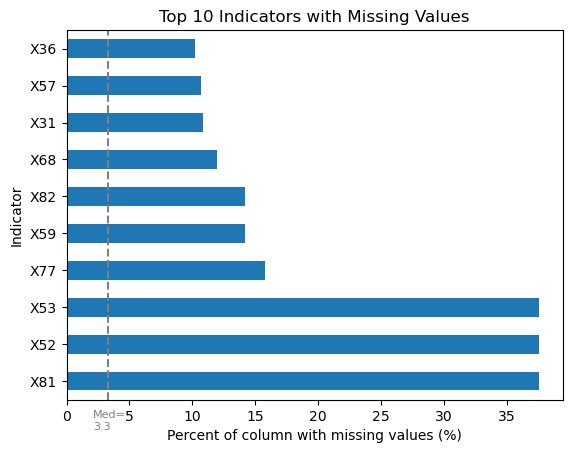

In [146]:
# Finding the number of columns with null values

sum = df.isnull().sum()/450 * 100
print(sum)
sum_sorted = sum.sort_values(ascending= False)



sum_sorted.head(10).plot.barh()
plt.axvline(x = 3.3, color='grey', linestyle='--', label = "Median = 4.28")
plt.text(2.1,-1.3,"Med=\n3.3",rotation=0, fontsize= 8, color = 'grey')
plt.title("Top 10 Indicators with Missing Values")
plt.xlabel("Percent of column with missing values (%)")
plt.ylabel("Indicator")

sum_sorted.head(10)

sum_sorted.describe()


#sum_sorted.plot.barh()
# df['education'].value_counts().plot.barh()
# plt.xlabel('count')
# plt.ylabel('education level')
# plt.title('incorrect and misleading!')
# plt.tight_layout()
# plt.show()


## Ratios/indicators that the paper suggested as significant differently between sectors for assessing yearly/quarterly:


-Turnover ratios: X8 (Net sales revenue/total assets), X30 (Total operating revenue/total assets), X49 (Sales revenues/short-term liabilities), X50 (Sales/fixed assets) 

-Debt ratios: X25 (Total liabilities-cash)/sales revenues), X28 (Operating expenses/total liabilities)

-Size of the enterprise: X24 (Logarithm of total assets)

-Ratio for liquidity (X34) ((Current assets-inventory-receivables)/short-term liabilities)

-Profitability ratio (X39) (EBITDA */sales revenues)

### Visualizing the indicators below.



In [105]:
df = df.replace( 0, 0.00000000000001)

key = ['X8', "X30", "X49", "X50", "X25", "X28", "X24", "X34", "X39"]

select_df = df[['X8', "X30", "X49", "X50", "X25", "X28", "X24", "X34", "X39"]]
select_df.head()

,X8,X30,X49,X50,X25,X28,X24,X34,X39
0,1.080000e+00,1.120000e+00,2.370000e+00,3.040000e+00,-1.000000e-02,1.860000e+00,6.240000e+00,1.250000e+00,1.600000e-01
1,6.500000e-01,6.600000e-01,3.560000e+00,8.700000e-01,6.500000e-01,1.280000e+00,6.280000e+00,6.700000e-01,1.600000e-01
2,9.300000e-01,9.400000e-01,2.820000e+00,1.400000e+00,7.100000e-01,1.220000e+00,5.910000e+00,4.600000e-01,1.200000e-01
3,8.500000e-01,8.600000e-01,1.600000e+00,2.700000e+00,4.100000e-01,1.480000e+00,5.160000e+00,4.600000e-01,2.000000e-02
4,1.000000e-14,1.000000e-14,1.000000e-14,1.000000e-14,1.000000e-14,1.000000e-14,1.000000e-14,1.000000e-14,1.000000e-14


Text(0, 0.5, 'Quantity of companies (n)')

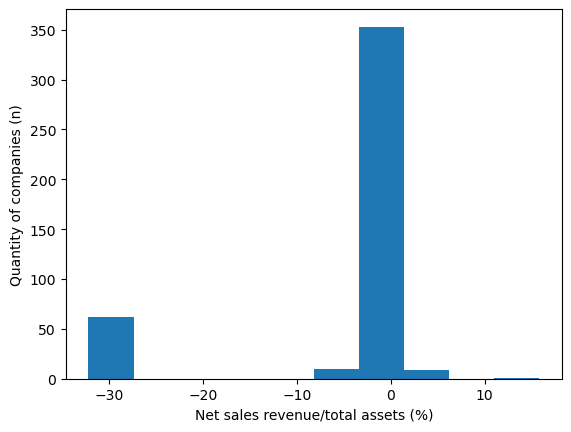

In [62]:
sorted_y = df['X8']
plt.hist(np.log(sorted_y))
plt.xlabel('Net sales revenue/total assets (%)')
plt.ylabel('Quantity of companies (n)')


Text(0, 0.5, 'Quantity of companies (n)')

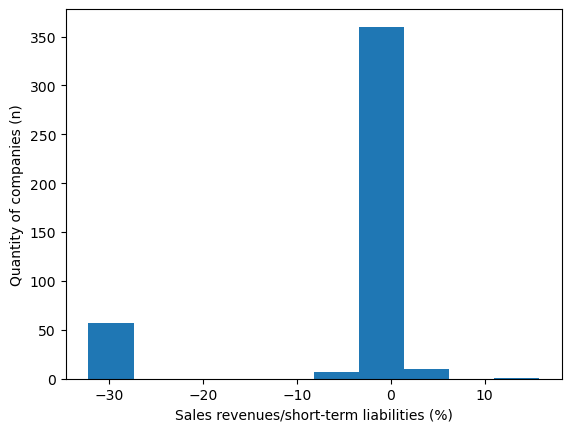

In [13]:
sorted_y = df['X30']
plt.hist(np.log(sorted_y))
plt.xlabel('Sales revenues/short-term liabilities (%)')
plt.ylabel('Quantity of companies (n)')

Text(0, 0.5, 'Quantity of companies (n)')

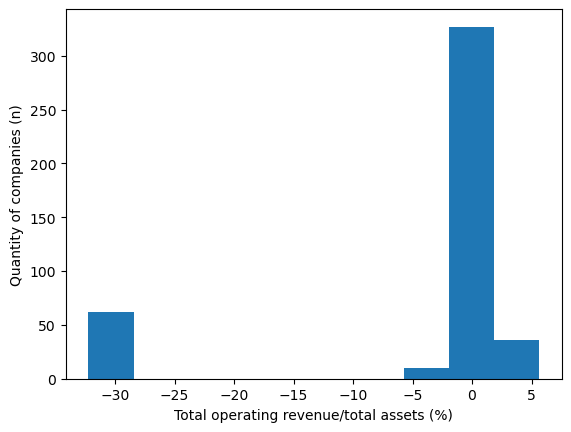

In [63]:
sorted_y = df['X49']
plt.hist(np.log(sorted_y))
plt.xlabel('Total operating revenue/total assets (%)')
plt.ylabel('Quantity of companies (n)')

In [ ]:
sorted_y = df['X50']
plt.hist(np.log(sorted_y))
plt.xlabel('Sales/fixed assets (%)')
plt.ylabel('Quantity of companies (n)')

In [ ]:
sorted_y = df['X25']
plt.hist(np.log(sorted_y))
plt.xlabel('Total liabilities-cash)/sales revenues (%)')
plt.ylabel('Quantity of companies (n)')

In [ ]:
sorted_y = df['X28']
plt.hist(np.log(sorted_y))
plt.xlabel('Operating expenses/total liabilities (%)')
plt.ylabel('Quantity of companies (n)')

count    4.350000e+02
mean     3.885586e+00
std      1.744192e+00
min      1.000000e-14
25%      3.450000e+00
50%      4.280000e+00
75%      4.995000e+00
max      7.320000e+00
Name: X24, dtype: float64

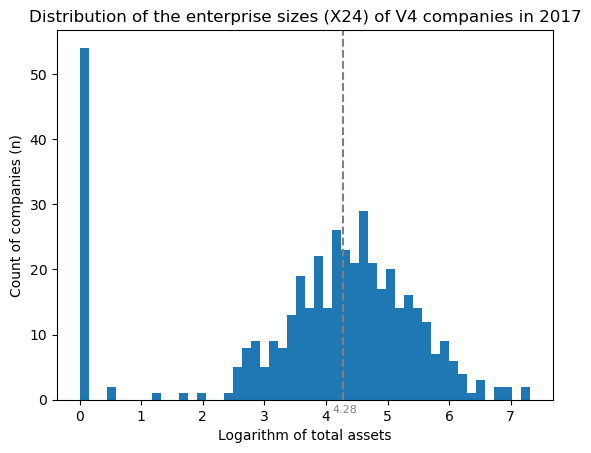

In [121]:
sorted_y = df['X24']
plt.hist(sorted_y, bins = 50)
plt.xlabel('Logarithm of total assets')
plt.ylabel('Count of companies (n)')
plt.title("Distribution of the enterprise sizes (X24) of V4 companies in 2017")
plt.axvline(x=4.28, color='grey', linestyle='--', label = "Median = 4.28")
plt.text(4.1,-2,"4.28",rotation=0, fontsize= 8, color = 'grey')

df['X24'].describe()

In [84]:
df = df.replace(0.00000000000001,0)
sorted_y = df['X24']
print(sorted_y.isnull().sum()) # There are 15 missing values for logarithm of assets.
count = 0
for i in sorted_y: 
    if i == 0: count +=1 
print(count)

# There are 54 companies with assets of log 0. They are bankrupt. 

indices = df[df['X24'] == 0]
indices.head(10)

15
54


,Num,Country,X1,X2,X3,X4,X5,X6,X7,X8,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,S
4,74,Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,100,Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12,276,Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13,290,Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
28,90,Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
34,117,Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
54,289,Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
81,437,Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
82,440,Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
93,20,Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,3.7,1.0,1.0,1.0,1.0,1.0,3


In [ ]:
# sorted_y = sorted_y.sort_values()
# neg = 0
# pos = 0
# for i in sorted_y:
#     if i < 0: 
#         neg +=1 
#     else: pos+=1

# print(pos, neg)
# sorted_y.head(10)

sorted_y.describe()


In [ ]:
sorted_y = df['X34']
plt.hist(np.log(sorted_y))
plt.xlabel('(Current assets-inventory-receivables)/short-term liabilities (%)')
plt.ylabel('Quantity of companies (n)')

In [ ]:
sorted_y = df['X39']
plt.hist(np.log(sorted_y))
plt.xlabel('EBITDA */sales revenues (%)')
plt.ylabel('Quantity of companies (n)')

##  Visualizing the distribution of sectors. 

Text(0.5, 1.0, 'Distribution of Sectors of V4 Companies in 2017')

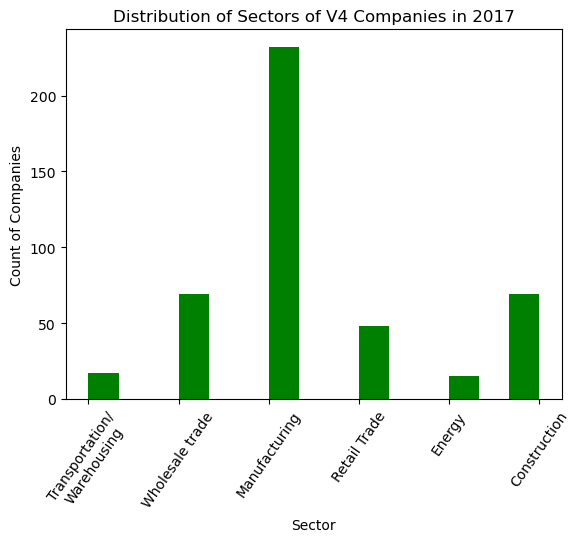

In [53]:
'''
Visualizing the distribution of sectors.
1. Transportation and warehousing; 2. Wholesale trade; 3. Manufacturing; 4. Retail trade; 5. Energy; 6. Construction.
'''

plt.hist(df['S'], bins = 15, color='green')
plt.ylabel("Count of Companies")
plt.xlabel("Sector")
plt.xticks(ticks= np.arange(1,7,1), labels = ["Transportation/\nWarehousing", "Wholesale trade","Manufacturing", "Retail Trade", "Energy", "Construction"], rotation=55)
#plt.set_xlabel()
plt.title("Distribution of Sectors of V4 Companies in 2017")

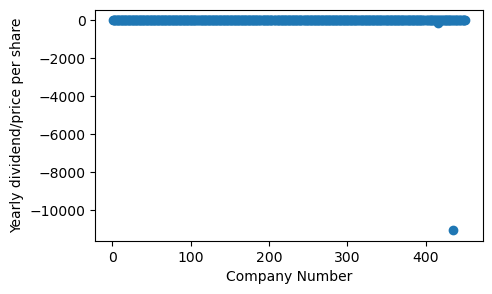

In [15]:
plt.figure(figsize=(5,3))

plt.plot(df['Num'],df['X6'], 'o')
plt.xlabel('Company Number')
plt.ylabel('Yearly dividend/price per share')
plt.show()


In [ ]:
print(np.arange(1,7,1))

## Visualizing working capital by sector below. Histogram, violin plots, barplots.

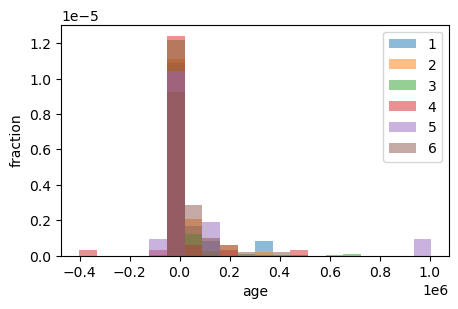

In [17]:
categories = df['S'].unique()
bin_range = (df['X44'].min(),df['X44'].max())

plt.figure(figsize=(5,3))

for c in categories:
        plt.hist(df[df['S']==c]['X44'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('age')
plt.show()

/Users/dy/opt/miniconda3/envs/data1030_env/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


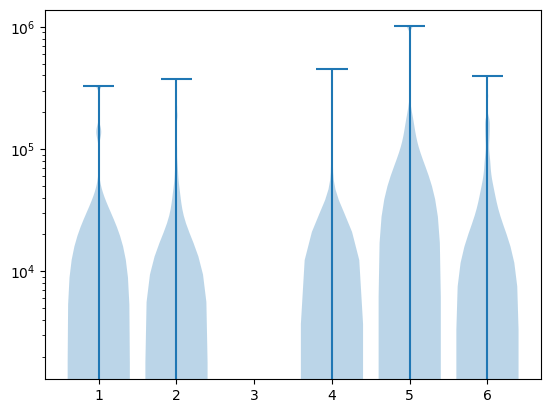

In [33]:


df = df.replace( 0, 0.00000000000001)

grouped_data = [df['X44'][df['S'] == category] for category in df['S'].unique()]


dataset = [df[df['S']==1]['X44'].values,
           df[df['S']==2]['X44'].values,
           df[df['S']==3]['X44'].values,
           df[df['S']==4]['X44'].values,
           df[df['S']==5]['X44'].values,
           df[df['S']==6]['X44'].values]
#grouped_data = [np.log(i) for i in grouped_data]
#print(grouped_data[2])
plt.violinplot(dataset, positions=np.arange(1,7,1),widths=0.8, bw_method=0.2)
plt.yscale('log')

# Note that sector 3 is missing because there is a nan (float) value in the array.



(array([], dtype=int64),)


{'bodies': [<matplotlib.collections.PolyCollection at 0x173948c80>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x172f02a20>,
 'cmins': <matplotlib.collections.LineCollection at 0x172fb3320>,
 'cbars': <matplotlib.collections.LineCollection at 0x1739aa270>}

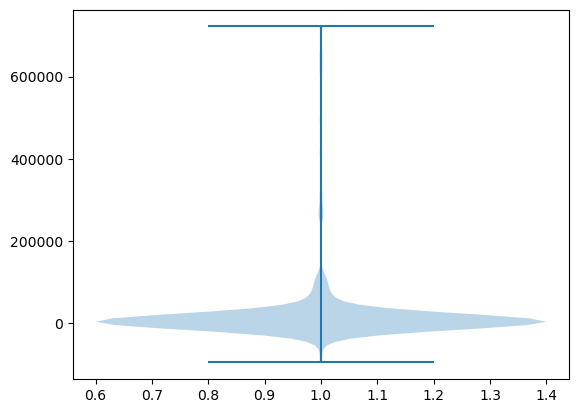

In [34]:
# Removing the nan value

faulty = df[df['S']==3]['X44'].values
print(np.where(faulty == float(np.NaN)))

fixed = np.delete(df[df['S']==3]['X44'].values, 6)
fixed = np.append(fixed, 0)

plt.violinplot(fixed,widths=0.8, bw_method=0.2)



                   0
count      17.000000
mean    29588.129412
std     84386.003069
min    -23010.000000
25%         0.000000
50%       457.000000
75%     16493.840000
max    327846.000000
                   0
count      69.000000
mean    22945.807101
std     60692.561380
min     -5820.000000
25%        70.000000
50%       982.830000
75%     15203.000000
max    371125.730000
                   0
count     231.000000
mean    22609.830736
std     92908.394902
min    -96937.930000
25%         0.000000
50%      1069.000000
75%     10903.030000
max    722373.000000
                   0
count      48.000000
mean     7798.891667
std     95710.566702
min   -402393.260000
25%       -94.500000
50%       344.880000
75%      4059.185000
max    452993.000000
                  0
count  1.500000e+01
mean   8.162319e+04
std    2.606753e+05
min   -6.989027e+04
25%    6.829500e+01
50%    2.255700e+03
75%    1.089250e+04
max    1.006233e+06
                   0
count      69.000000
mean    36290.196087
s

Text(0.5, 1.0, 'Working capital (X44) between different sectors of V4 companies in 2017')

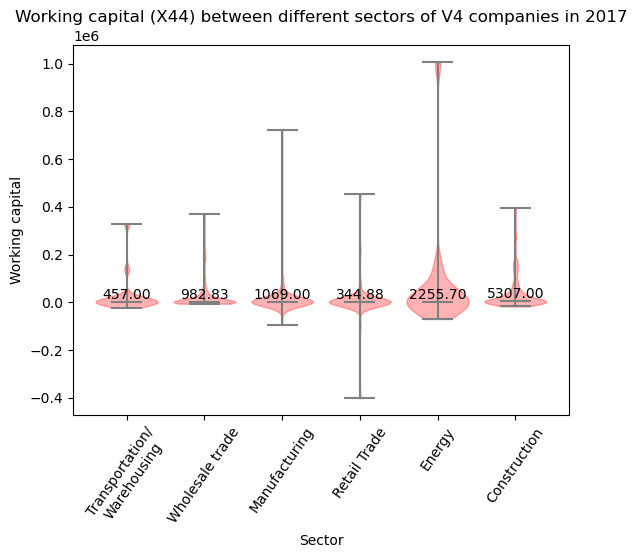

In [93]:
# Violin plots by sector of working capital, X44. With Medians
fixed_dataset = [df[df['S']==1]['X44'].values,
           df[df['S']==2]['X44'].values,
           np.delete(df[df['S']==3]['X44'].values, 6),
           df[df['S']==4]['X44'].values,
           df[df['S']==5]['X44'].values,

           df[df['S']==6]['X44'].values]

for j in fixed_dataset: 
    j = pd.DataFrame(j)
    print(j.describe())

fig, ax = plt.subplots()
parts = ax.violinplot(fixed_dataset, positions=np.arange(1,7,1),widths=0.8, bw_method=0.2, showmedians= True)


# Labeling median values. We see high variation in the data so we choose the median to compare.
medians = [np.median(d) for d in fixed_dataset]


for i, median in enumerate(medians):
    ax.text(i + 1, median, f'{median:.2f}', 
            horizontalalignment='center', 
            verticalalignment='bottom', 
            color='black')

for partname in ('cbars','cmins','cmaxes','cmedians'):
    bars = parts[partname]
    bars.set_edgecolor("Grey")

for vp in parts['bodies']:
    vp.set_facecolor("red")
    vp.set_edgecolor("Red")



plt.xticks(ticks=np.arange(1,7,1),labels = ["Transportation/\nWarehousing", "Wholesale trade","Manufacturing", "Retail Trade", "Energy", "Construction"], rotation=55)
plt.xlabel("Sector")
plt.ylabel("Working capital")
plt.title("Working capital (X44) between different sectors of V4 companies in 2017")

#plt.yscale('log')

/var/folders/mb/wf85ypdj4js14nmbp7j43crr0000gn/T/ipykernel_65230/863571427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean[i] = clean[i].astype(float)


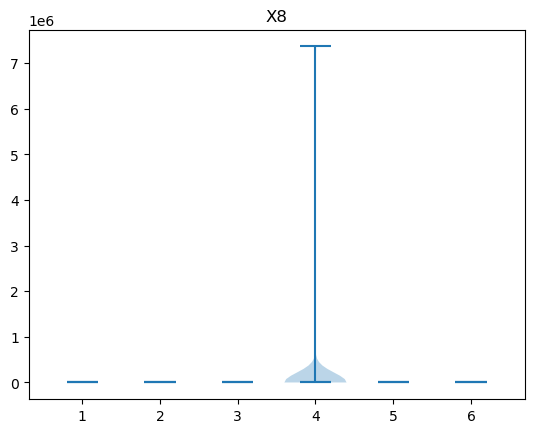

/var/folders/mb/wf85ypdj4js14nmbp7j43crr0000gn/T/ipykernel_65230/863571427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean[i] = clean[i].astype(float)


count    17.000000
mean      0.755294
std       0.883347
min       0.000000
25%       0.080000
50%       0.650000
75%       1.080000
max       3.560000
Name: X8, dtype: float64
count    66.000000
mean      1.478485
std       1.421738
min       0.000000
25%       0.532500
50%       1.280000
75%       1.805000
max       6.340000
Name: X8, dtype: float64
count    222.000000
mean       0.828649
std        0.648586
min        0.000000
25%        0.340000
50%        0.805000
75%        1.147500
max        3.280000
Name: X8, dtype: float64
count    4.700000e+01
mean     1.567324e+05
std      1.074492e+06
min      0.000000e+00
25%      3.400000e-01
50%      1.320000e+00
75%      2.395000e+00
max      7.366346e+06
Name: X8, dtype: float64
count    15.000000
mean      0.508667
std       0.474671
min       0.000000
25%       0.175000
50%       0.390000
75%       0.735000
max       1.510000
Name: X8, dtype: float64
count    68.000000
mean      0.564706
std       0.713891
min       0.000000
25%    

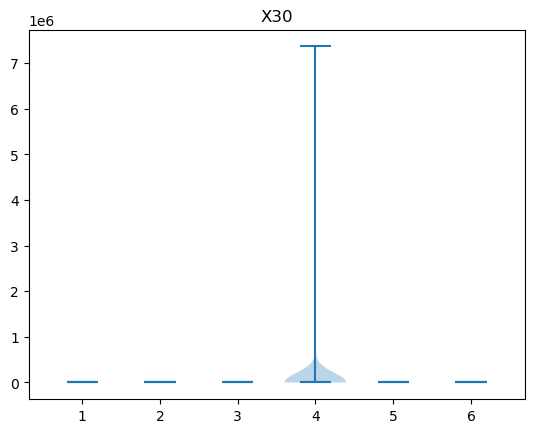

count    17.000000
mean      0.781765
std       0.879384
min       0.000000
25%       0.090000
50%       0.660000
75%       1.120000
max       3.560000
Name: X30, dtype: float64
count    66.000000
mean      1.503182
std       1.415707
min       0.000000
25%       0.540000
50%       1.285000
75%       1.817500
max       6.350000
Name: X30, dtype: float64
count    222.000000
mean       0.980901
std        2.095222
min        0.000000
25%        0.390000
50%        0.825000
75%        1.160000
max       30.620000
Name: X30, dtype: float64
count    4.700000e+01
mean     1.567324e+05
std      1.074492e+06
min      0.000000e+00
25%      3.750000e-01
50%      1.330000e+00
75%      2.405000e+00
max      7.366346e+06
Name: X30, dtype: float64
count    15.000000
mean      0.524667
std       0.497047
min       0.000000
25%       0.190000
50%       0.400000
75%       0.735000
max       1.530000
Name: X30, dtype: float64
count    68.000000
mean      0.582941
std       0.713309
min       0.000000
25

/var/folders/mb/wf85ypdj4js14nmbp7j43crr0000gn/T/ipykernel_65230/863571427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean[i] = clean[i].astype(float)


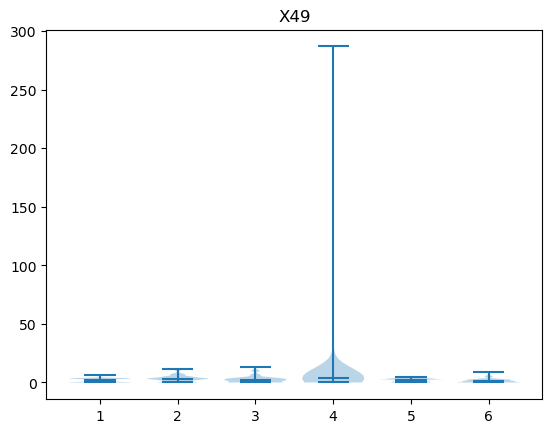

/var/folders/mb/wf85ypdj4js14nmbp7j43crr0000gn/T/ipykernel_65230/863571427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean[i] = clean[i].astype(float)


count    17.000000
mean      2.088824
std       1.790506
min       0.000000
25%       0.420000
50%       2.370000
75%       3.400000
max       5.970000
Name: X49, dtype: float64
count    66.000000
mean      3.549091
std       2.829900
min       0.000000
25%       1.742500
50%       3.190000
75%       4.782500
max      11.680000
Name: X49, dtype: float64
count    222.000000
mean       2.880856
std        2.645554
min        0.000000
25%        1.012500
50%        2.400000
75%        3.850000
max       13.460000
Name: X49, dtype: float64
count     47.000000
mean      10.398298
std       41.600966
min        0.000000
25%        1.880000
50%        4.170000
75%        5.755000
max      286.950000
Name: X49, dtype: float64
count    15.000000
mean      2.057333
std       1.398328
min       0.000000
25%       0.830000
50%       2.310000
75%       3.205000
max       4.330000
Name: X49, dtype: float64
count    68.000000
mean      1.689706
std       1.680383
min       0.000000
25%       0.492500

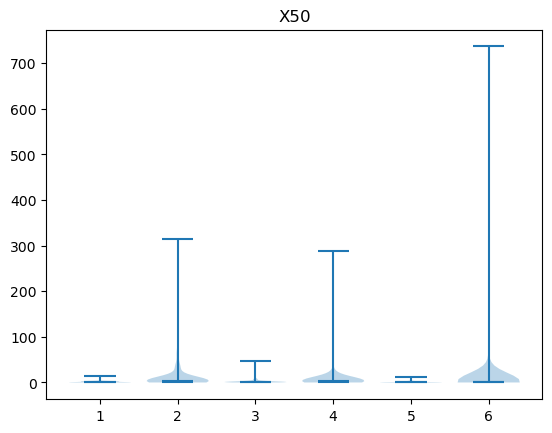

count    17.000000
mean      1.895294
std       3.242640
min       0.000000
25%       0.090000
50%       0.870000
75%       2.510000
max      13.720000
Name: X50, dtype: float64
count     64.000000
mean      14.799219
std       41.767204
min        0.000000
25%        1.007500
50%        3.660000
75%       10.710000
max      315.000000
Name: X50, dtype: float64
count    221.000000
mean       2.354253
std        4.201370
min        0.000000
25%        0.540000
50%        1.430000
75%        2.640000
max       47.470000
Name: X50, dtype: float64
count     47.000000
mean      10.647660
std       41.591897
min        0.000000
25%        0.605000
50%        3.240000
75%        7.125000
max      287.500000
Name: X50, dtype: float64
count    15.000000
mean      1.473333
std       2.942588
min       0.000000
25%       0.245000
50%       0.520000
75%       0.945000
max      11.630000
Name: X50, dtype: float64
count     68.000000
mean      15.108382
std       89.621497
min        0.000000
25%   

/var/folders/mb/wf85ypdj4js14nmbp7j43crr0000gn/T/ipykernel_65230/863571427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean[i] = clean[i].astype(float)


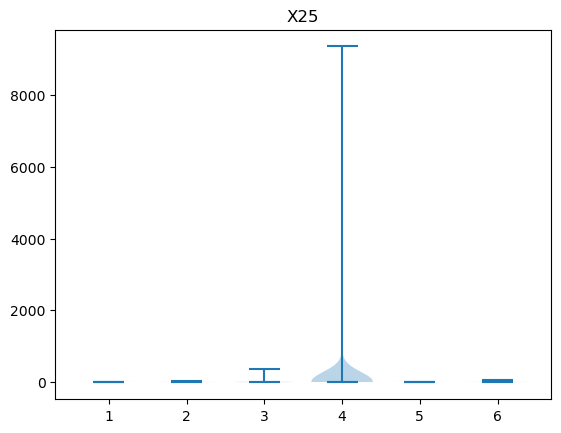

count    17.000000
mean      0.594706
std       0.756960
min      -0.010000
25%       0.000000
50%       0.410000
75%       0.650000
max       2.740000
Name: X25, dtype: float64
count    64.000000
mean      1.269375
std       4.660789
min      -0.630000
25%       0.157500
50%       0.310000
75%       0.482500
max      32.210000
Name: X25, dtype: float64
count    220.000000
mean       3.219182
std       25.903003
min       -2.680000
25%        0.170000
50%        0.405000
75%        0.760000
max      375.100000
Name: X25, dtype: float64
count      46.000000
mean      210.229565
std      1379.159584
min        -0.110000
25%         0.182500
50%         0.250000
75%         0.570000
max      9356.790000
Name: X25, dtype: float64
count    15.000000
mean      1.102000
std       0.982615
min       0.000000
25%       0.485000
50%       0.830000
75%       1.220000
max       3.320000
Name: X25, dtype: float64
count    68.000000
mean      2.353971
std       8.145385
min     -13.220000
25%       

/var/folders/mb/wf85ypdj4js14nmbp7j43crr0000gn/T/ipykernel_65230/863571427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean[i] = clean[i].astype(float)


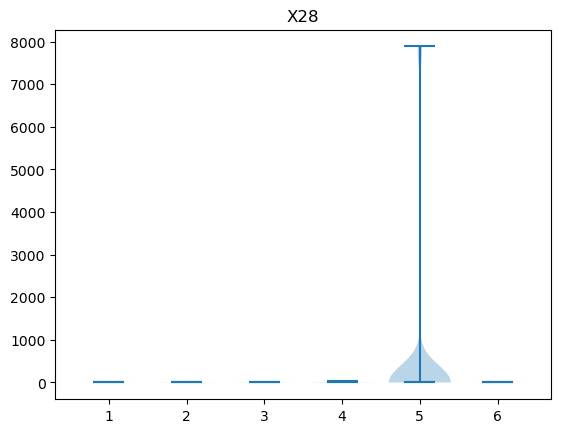

count    17.000000
mean      1.428235
std       1.515059
min       0.000000
25%       0.230000
50%       1.280000
75%       1.860000
max       5.760000
Name: X28, dtype: float64
count    66.000000
mean      2.840000
std       2.387484
min       0.000000
25%       1.167500
50%       2.530000
75%       3.757500
max      10.630000
Name: X28, dtype: float64
count    222.000000
mean       2.165000
std        2.187337
min        0.000000
25%        0.850000
50%        1.755000
75%        2.790000
max       12.820000
Name: X28, dtype: float64
count    46.000000
mean      3.654565
std       5.441946
min       0.000000
25%       0.955000
50%       2.825000
75%       4.327500
max      36.030000
Name: X28, dtype: float64
count      15.000000
mean      526.595333
std      2036.499013
min         0.000000
25%         0.310000
50%         0.750000
75%         1.175000
max      7888.100000
Name: X28, dtype: float64
count    68.000000
mean      1.341324
std       2.197968
min       0.000000
25%       

/var/folders/mb/wf85ypdj4js14nmbp7j43crr0000gn/T/ipykernel_65230/863571427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean[i] = clean[i].astype(float)


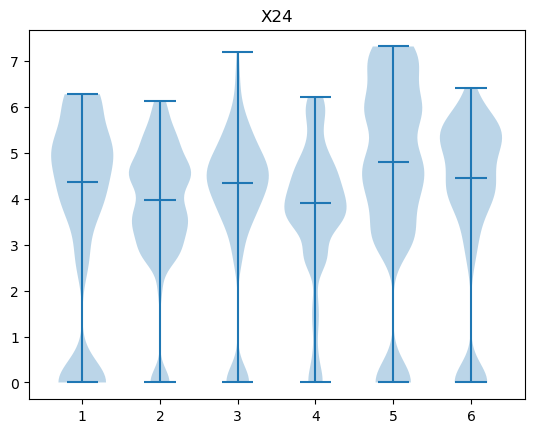

count    17.000000
mean      3.665294
std       2.288234
min       0.000000
25%       2.690000
50%       4.360000
75%       5.190000
max       6.280000
Name: X24, dtype: float64
count    66.000000
mean      3.816061
std       1.439462
min       0.000000
25%       3.202500
50%       3.985000
75%       4.707500
max       6.130000
Name: X24, dtype: float64
count    222.000000
mean       3.911081
std        1.714820
min        0.000000
25%        3.582500
50%        4.335000
75%        4.877500
max        7.210000
Name: X24, dtype: float64
count    47.000000
mean      3.719149
std       1.525108
min       0.000000
25%       3.300000
50%       3.900000
75%       4.595000
max       6.230000
Name: X24, dtype: float64
count    15.000000
mean      4.500667
std       2.248480
min       0.000000
25%       3.510000
50%       4.810000
75%       5.995000
max       7.320000
Name: X24, dtype: float64
count    68.000000
mean      3.904265
std       1.992226
min       0.000000
25%       3.515000
50%    

/var/folders/mb/wf85ypdj4js14nmbp7j43crr0000gn/T/ipykernel_65230/863571427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean[i] = clean[i].astype(float)


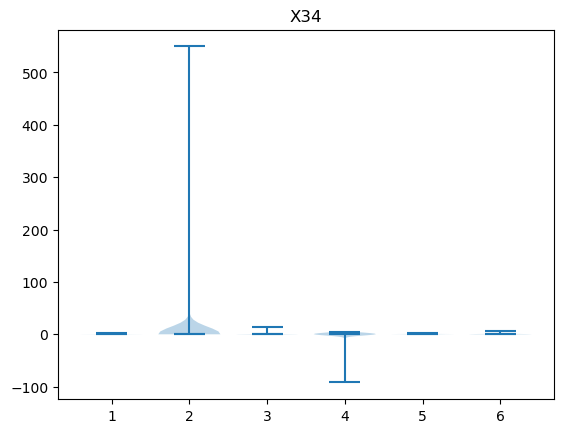

count    17.000000
mean      0.435294
std       0.496829
min       0.000000
25%       0.040000
50%       0.300000
75%       0.670000
max       1.600000
Name: X34, dtype: float64
count     66.000000
mean       8.867879
std       67.584042
min        0.000000
25%        0.052500
50%        0.150000
75%        0.520000
max      549.500000
Name: X34, dtype: float64
count    221.000000
mean       0.505204
std        1.314810
min        0.000000
25%        0.040000
50%        0.140000
75%        0.520000
max       13.100000
Name: X34, dtype: float64
count    47.000000
mean     -1.333191
std      13.542196
min     -91.940000
25%       0.080000
50%       0.230000
75%       0.605000
max       4.210000
Name: X34, dtype: float64
count    15.000000
mean      0.623333
std       0.526276
min       0.000000
25%       0.285000
50%       0.510000
75%       0.825000
max       1.630000
Name: X34, dtype: float64
count    68.000000
mean      0.640441
std       1.123589
min       0.000000
25%       0.075000

/var/folders/mb/wf85ypdj4js14nmbp7j43crr0000gn/T/ipykernel_65230/863571427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean[i] = clean[i].astype(float)


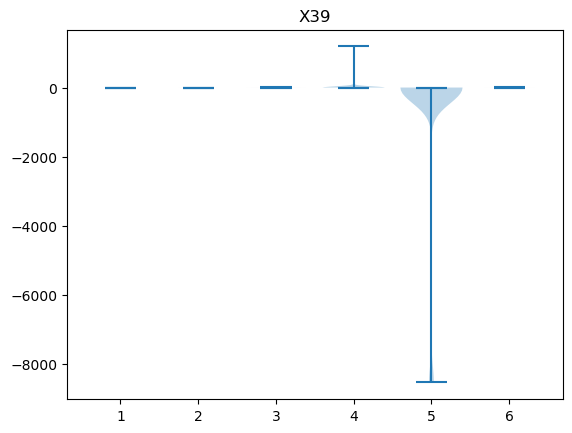

count    17.000000
mean      0.136471
std       0.244616
min      -0.030000
25%       0.000000
50%       0.030000
75%       0.160000
max       0.880000
Name: X39, dtype: float64
count    64.000000
mean      0.052969
std       0.183603
min      -1.090000
25%       0.007500
50%       0.040000
75%       0.100000
max       0.710000
Name: X39, dtype: float64
count    216.000000
mean       0.005093
std        1.366220
min      -11.670000
25%        0.000000
50%        0.065000
75%        0.120000
max       12.900000
Name: X39, dtype: float64
count      46.000000
mean       26.063913
std       175.247779
min        -0.300000
25%         0.000000
50%         0.030000
75%         0.090000
max      1188.790000
Name: X39, dtype: float64
count      14.000000
mean     -609.638571
std      2281.556595
min     -8536.670000
25%         0.000000
50%         0.105000
75%         0.207500
max         0.330000
Name: X39, dtype: float64
count    68.000000
mean      0.183824
std       0.770470
min      -0.7

In [95]:
df = pd.read_csv('/Users/dy/Desktop/DATA1030/DATA1030-Fall2024/untitled folder/V4 data/2017.csv')
df = df.replace("m", np.nan)

grouped_data_24 = []

key = ['X8', "X30", "X49", "X50", "X25", "X28", "X24", "X34", "X39"]
df_copy = df.copy()
for i in key:
    smaller = df_copy[[i, 'S']]
    clean = smaller.dropna()
    clean[i] = clean[i].astype(float)

    grouped_data = [clean[i][clean['S'] == category] for category in clean['S'].unique()]
    if i == "X24" : grouped_data_24 = grouped_data


    plt.violinplot(grouped_data, positions=np.arange(1,7,1),widths=0.8, bw_method=0.2, showmedians=True)
    plt.title("%s" % i)
    plt.show()
    for j in grouped_data: print(j.describe())





             X24
count  17.000000
mean    3.665294
std     2.288234
min     0.000000
25%     2.690000
50%     4.360000
75%     5.190000
max     6.280000
             X24
count  66.000000
mean    3.816061
std     1.439462
min     0.000000
25%     3.202500
50%     3.985000
75%     4.707500
max     6.130000
              X24
count  222.000000
mean     3.911081
std      1.714820
min      0.000000
25%      3.582500
50%      4.335000
75%      4.877500
max      7.210000
             X24
count  47.000000
mean    3.719149
std     1.525108
min     0.000000
25%     3.300000
50%     3.900000
75%     4.595000
max     6.230000
             X24
count  15.000000
mean    4.500667
std     2.248480
min     0.000000
25%     3.510000
50%     4.810000
75%     5.995000
max     7.320000
             X24
count  68.000000
mean    3.904265
std     1.992226
min     0.000000
25%     3.515000
50%     4.450000
75%     5.372500
max     6.420000


Text(0.5, 1.0, 'Logarithm of total assets (X24) between different sectors of V4 companies in 2017')

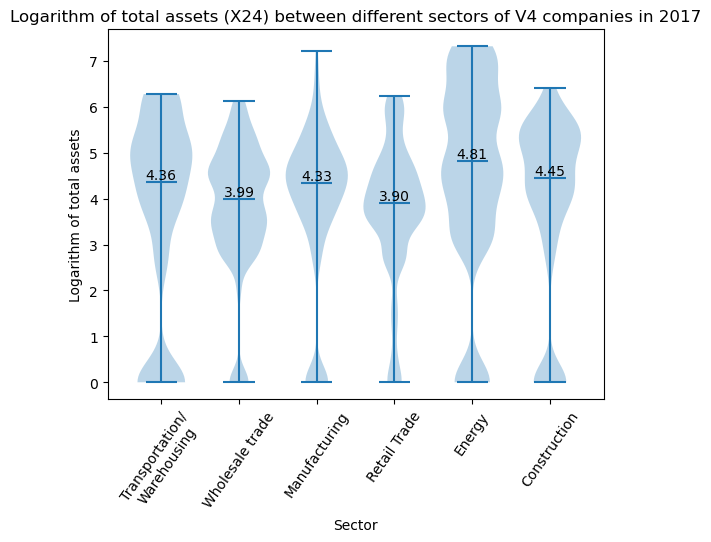

In [98]:
# Violin plot for indictor X24, entrerprise size based on Logarithm of total asssets

for j in grouped_data_24: 
    j = pd.DataFrame(j)
    print(j.describe())

fig, ax = plt.subplots()
parts = ax.violinplot(grouped_data_24, positions=np.arange(1,7,1),widths=0.8, bw_method=0.2, showmedians= True)


# Labeling median values. We see high variation in the data so we choose the median to compare.
medians = [np.median(d) for d in grouped_data_24]


for i, median in enumerate(medians):
    ax.text(i + 1, median, f'{median:.2f}', 
            horizontalalignment='center', 
            verticalalignment='bottom', 
            color='black')



plt.xticks(ticks=np.arange(1,7,1),labels = ["Transportation/\nWarehousing", "Wholesale trade","Manufacturing", "Retail Trade", "Energy", "Construction"], rotation=55)
plt.xlabel("Sector")
plt.ylabel("Logarithm of total assets")
plt.title("Logarithm of total assets (X24) between different sectors of V4 companies in 2017")


# More miscellaneous visualizations below.

In [ ]:
plt.figure(figsize=(5,3))

plt.plot(df['Num'],df['X82'], 'o')
plt.xlabel('Net cash flow(n)/net cash flow (n−1)')
plt.ylabel('Percent')
plt.show()

In [ ]:
plt.figure(figsize=(5,3))

plt.plot(df['Num'],df['X65'], 'o')
plt.xlabel('Company Number')
plt.ylabel('Yearly dividend/price per share')
plt.show()


In [ ]:
plt.figure(figsize=(5,3))

plt.plot(df['Num'],df['X62'], 'o')
plt.xlabel('Company Number')
plt.ylabel('Net profit per share')
plt.show()


In [ ]:
plt.figure(figsize=(5,3))

plt.plot(df['Num'],df['X63'], 'o')
plt.xlabel('Company Number')
plt.ylabel('Income/outstanding shares')
plt.show()

In [ ]:
plt.figure(figsize=(5,3))

plt.plot(df['Num'],df['X40'], 'o')
plt.xlabel('Company Number')
plt.ylabel('Current assets/total liabilities')
plt.show()

In [ ]:
plt.figure(figsize=(5,3))

plt.plot(df['Num'],df['X24'], 'o')
plt.xlabel('Company Number')
plt.ylabel('Logarithm of total assets')
plt.show()

In [ ]:
plt.figure(figsize=(5,3))

plt.plot(df['Num'],df['X25'], 'o')
plt.xlabel('Company Number')
plt.ylabel('(Total liabilities-cash)/sales revenues')
plt.show()

In [ ]:
plt.figure(figsize=(5,3))

plt.plot(df['Num'],df['X15'], 'o')
plt.xlabel('Company Number')
plt.ylabel('Total assets/total liabilities')
plt.show()

In [ ]:
df['X2'].describe()
arr = df['X2'].to_numpy()
index = np.where(arr == max(arr))

print(index)

df.loc[318]

new = df['X2'].drop(318)

plt.plot(df['Num'].drop(318),new, 'o')
plt.xlabel('Company Number')
plt.ylabel('X2')
plt.yscale('log')
plt.show()


In [ ]:
# Attributes that are only 0 or 1

plt.figure(figsize=(5,3))
for i in range(72,77):
    indices = np.lexsort((df['X%d' % (i)], df['Num'])) 

    sorted_num = df['Num'][indices]
    sorted_y = df['X%d' % (i)][indices]
    plt.plot(sorted_num,sorted_y, 'o')
    plt.xlabel('Company Number')
    plt.ylabel('X%d' % (i))
    #     if (i >= 72 and i<=76) or (i >= 78 or i <= 82):
    #     plt.yscale('linear')
    # else: 
  
    plt.show()

In [ ]:
# Attributes that are only 0 or 1
plt.figure(figsize=(5,3))
for i in range(78,83):
    indices = np.lexsort((df['X%d' % (i)], df['Num'])) 

    sorted_num = df['Num'][indices]
    sorted_y = df['X%d' % (i)][indices]
    plt.plot(sorted_num,sorted_y, 'o')
    plt.xlabel('Company Number')
    plt.ylabel('X%d' % (i))
    #     if (i >= 72 and i<=76) or (i >= 78 or i <= 82):
    #     plt.yscale('linear')
    # else: 
  
    plt.show()

In [ ]:
sorted(df['X1'])

In [ ]:
df = df.replace(0, 0.0000000001)
sorted_y = np.log(df['X1'])
plt.hist(sorted_y)
plt.xlabel('X4')
#plt.ylabel('X%d' % (i))

# Column 4: Current assets/short-term liabilities
# Column 24 is interesting, logarithm of total assets
# Column 29: Profit on sales/total assets, those exceeding 1 have more profits on sales than total assets
# Column 44: Working capital, many companies are negative, which means that they have negative working capital
# Column 62 (net profit per share) is super sparse... why ?
# Column 77 (Net profit (n)/net profit (n−1)) has an interesting distribution, imputed 0 with 0.0000000001


In [ ]:
indices = np.lexsort((df['X4'], df['Num'])) 
print(indices)
# print(df['X4'][317])

max_index = df['X32'].idxmax()

print(max_index)
print(df.iloc[318]['Num'])

# Company 1 has the max outlier in X5... let's check to see if other plots iwht outliers are the same company
# Also in X2, X8, X9, X20, X30, 31

# Min outlier for 24 is ind 366, or company 3




In [ ]:
# Log scaled attributes, scatter plot
plt.figure(figsize=(5,3))
for i in range(1,df.shape[1]-2):
    indices = np.lexsort((df['X%d' % (i)], df['Num'])) 

    sorted_num = df['Num'][indices]
    sorted_y = df['X%d' % (i)][indices]
    plt.plot(sorted_num,sorted_y, 'o')
    plt.xlabel('Company Number')
    plt.ylabel('X%d' % (i))
    #     if (i >= 72 and i<=76) or (i >= 78 or i <= 82):
    #     plt.yscale('linear')
    # else: 
    plt.yscale('log')
    plt.show()

In [ ]:
df['X82'].describe()

In [ ]:
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)

In [ ]:
axl = pd.plotting.scatter_matrix(select_df.select_dtypes(float), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
# for i, axs in enumerate(axl):
#     for j, ax in enumerate(axs):
#         if i != j:  # only the scatter plots
#             ax.set_xscale('log')
#             ax.set_yscale('log')
plt.show()

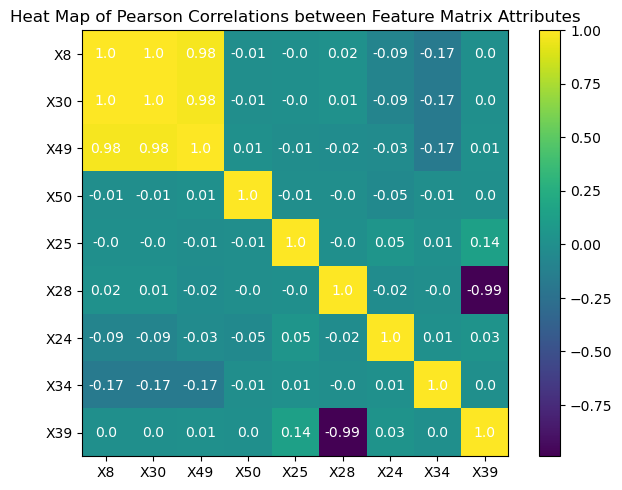

In [55]:
# Pearson Correlation matrix of selected indicators from paper

pearson = select_df.corr('pearson')
col_names = pearson.columns
pearson_arr = pearson.to_numpy(float)
pearson_arr = np.round(pearson_arr,2)

#print(pearson)



fig, ax = plt.subplots()
im = ax.imshow(pearson, norm = "linear") #This scales values between 0 and 1. 

ax.set_xticks(np.arange(len(col_names)), labels=col_names)
ax.set_yticks(np.arange(len(col_names)), labels=col_names)

# Loop over data dimensions and create text annotations.
for i in range(len(col_names)):
    for j in range(len(col_names)):
        text = ax.text(j, i, pearson_arr[i, j],ha="center", va="center", color="w")
    

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.title('Heat Map of Pearson Correlations between Feature Matrix Attributes')

plt.colorbar(im)

plt.show()

# Preprocessing Below

In [147]:
# Preprocessing
# We see that sectors are imbalanced, so we do a stratified split. First we do a regular split and then a Kfold. 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

sc = StandardScaler()

# Making feature matricies
tar = df['S']
f_mat = df.drop(columns=['S', 'Num', 'Country'])

f_mat.head()
tar.head()


random_state = 3
# Stratify split first
X_other, X_test, y_other, y_test = train_test_split(f_mat,tar,train_size = 0.2,stratify=tar,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))
X_train = []
y_train = []
X_val = []
y_val = []

kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))
    
X_train_prep = sc.fit_transform(X_train) #For continuous values



test balance: (array([1, 2, 3, 4, 5, 6]), array([ 14,  55, 186,  38,  12,  55]))
new fold
(array([1, 2, 3, 4, 5, 6]), array([ 2, 10, 35,  7,  2, 11]))
(array([1, 2, 3, 4, 5, 6]), array([ 1,  4, 11,  3,  1,  3]))
new fold
(array([1, 2, 3, 4, 5, 6]), array([ 2, 10, 35,  7,  3, 10]))
(array([1, 2, 3, 4, 6]), array([ 1,  4, 11,  3,  4]))
new fold
(array([1, 2, 3, 4, 5, 6]), array([ 3, 11, 34,  8,  2, 10]))
(array([2, 3, 4, 5, 6]), array([ 3, 12,  2,  1,  4]))
new fold
(array([1, 2, 3, 4, 5, 6]), array([ 2, 11, 34,  8,  2, 11]))
(array([1, 2, 3, 4, 5, 6]), array([ 1,  3, 12,  2,  1,  3]))


/Users/dy/opt/miniconda3/envs/data1030_env/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


In [ ]:
# ML Question: Can we predict the sector given the observation? Classification problem.
# We have time series data in the dataset: concatenating all of the dataframes means that the data is not IID. 